**DS 675001 Machine Learning Assignment 4**

# Upload the two data files, training data (train_data.csv) and test data (test_data.csv), into the assignment.

You should be able see the 'files' button in your left. Click the 'files' button, and then Click the first botton as 'Upload to session storage' to upload the two data files into this assignment.

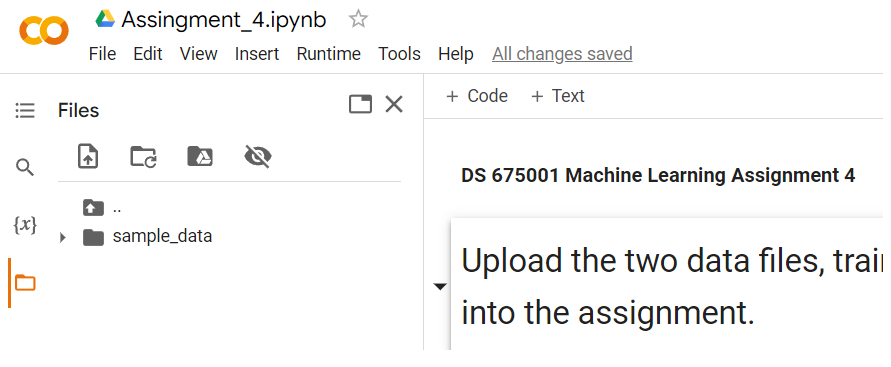




Each row represents a data sample. The first entry is the digit, and the next 256 entries are grayscale values between -1 and 1. These 256 pixels correspond to a 16 × 16 image.
        
Below, I have developed two features to measure the properties of the image (asymmetry and average density) that are useful in distinguishing between the digits 1 and 5. From the plot, we can see that digit 1 has relatively small values in both properties, indicating that digit 1 is more symmetric and has lower density.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV files
train_data = np.loadtxt('train_data.csv', delimiter=',')
test_data = np.loadtxt('test_data.csv', delimiter=',')

# Extract features and labels from the training and test data
X_train = train_data[:, 1:]
y_train = train_data[:, 0]
X_test = test_data[:, 1:]
y_test = test_data[:, 0]

# Replace label values 5 with -1
y_train[y_train == 5] = -1
y_test[y_test == 5] = -1

# Find indices of positive (1) and negative (-1) labels in the train and test data
index_positive_train = np.where(y_train == 1)[0]
index_negative_train = np.where(y_train == -1)[0]

index_positive_test = np.where(y_test == 1)[0]
index_negative_test = np.where(y_test == -1)[0]

# Create asymmetric and density features
asymmetric_train = np.mean(np.abs(X_train - np.flip(X_train, axis=1), dtype=float), axis=1)
asymmetric_test = np.mean(np.abs(X_test - np.flip(X_test, axis=1), dtype=float), axis=1)
density_train = np.mean(X_train, axis=1)
density_test = np.mean(X_test, axis=1)

# Combine symmetric and density features
Train_feature = np.column_stack((asymmetric_train, density_train))
Test_feature = np.column_stack((asymmetric_test, density_test))

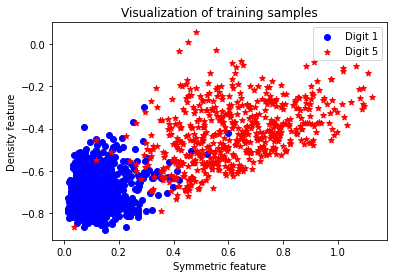

In [2]:
# Plot the training samples
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')
plt.title('Visualization of training samples')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()

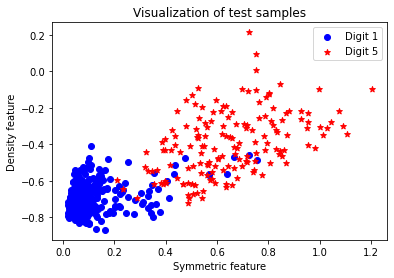

In [3]:
# Plot the test samples
plt.figure()
plt.scatter(Test_feature[index_positive_test, 0], Test_feature[index_positive_test, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Test_feature[index_negative_test, 0], Test_feature[index_negative_test, 1], c='r', marker='*', label='Digit 5')
plt.title('Visualization of test samples')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()

# An example code for PLA.

Pocket Algorithm - In-Sample Error (Training): 2.56%
Pocket Algorithm - In-Sample Error (Test): 5.19%


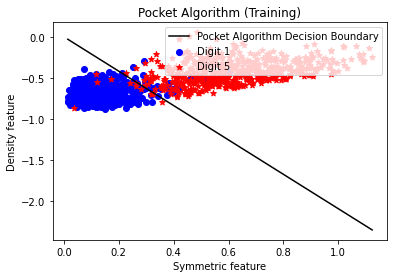

In [4]:
# Initialize weights and bias
w = np.zeros(2)
b = 0

# Initialize the pocket weights
w_pocket = w.copy()
b_pocket = b

# PLA training
max_iterations = 1000
converged = False
iteration = 0

while not converged and iteration < max_iterations:
    converged = True

    for i in range(len(Train_feature)):
        x = Train_feature[i]
        y = y_train[i]

        if y * (np.dot(w, x) + b) <= 0:
            w += y * x
            b += y
            converged = False

        # Check if the current weight vector is better than the one in the pocket
        if converged:
            correct_pocket = 0
            for j in range(len(Train_feature)):
                if y_train[j] * (np.dot(w_pocket, Train_feature[j]) + b_pocket) > 0:
                    correct_pocket += 1

            if correct_pocket < len(Train_feature):
                w_pocket = w.copy()
                b_pocket = b

    iteration += 1

# Calculate predictions
predictions_train_pocket = []
for i in range(len(Train_feature)):
    x = Train_feature[i]
    prediction = np.sign(np.dot(w_pocket, x) + b_pocket)
    predictions_train_pocket.append(prediction)

predictions_test_pocket = []
for i in range(len(Test_feature)):
    x = Test_feature[i]
    prediction = np.sign(np.dot(w_pocket, x) + b_pocket)
    predictions_test_pocket.append(prediction)

# Calculate in-sample error
error_train_pocket = 1 - np.mean(np.array(predictions_train_pocket) == y_train)
error_test_pocket = 1 - np.mean(np.array(predictions_test_pocket) == y_test)

print("Pocket Algorithm - In-Sample Error (Training): {:.2f}%".format(error_train_pocket * 100))
print("Pocket Algorithm - In-Sample Error (Test): {:.2f}%".format(error_test_pocket * 100))

# Visualization
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for Pocket Algorithm
x_decision_pocket = np.linspace(np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0]), 100)
y_decision_pocket = (-w_pocket[0] / w_pocket[1]) * x_decision_pocket - (b_pocket / w_pocket[1])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='Pocket Algorithm Decision Boundary')

plt.title('Pocket Algorithm (Training)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()

# An example code for Pocket using pre-exist libraries.

Pocket Algorithm - In-Sample Error (Training): 2.43%
Pocket Algorithm - In-Sample Error (Test): 6.37%


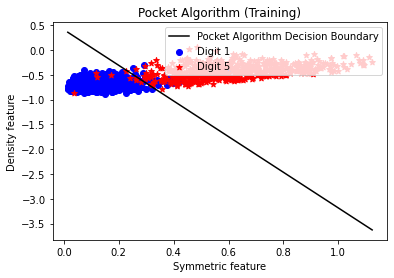

In [5]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Fit a perceptron model (Pocket Algorithm)
pocket_model = Perceptron(max_iter=1000)
pocket_model.fit(Train_feature, y_train)

# Calculate predictions
predictions_train_pocket = pocket_model.predict(Train_feature)
predictions_test_pocket = pocket_model.predict(Test_feature)

# Calculate in-sample error
error_train_pocket = 1 - accuracy_score(y_train, predictions_train_pocket)
error_test_pocket = 1 - accuracy_score(y_test, predictions_test_pocket)

print("Pocket Algorithm - In-Sample Error (Training): {:.2f}%".format(error_train_pocket * 100))
print("Pocket Algorithm - In-Sample Error (Test): {:.2f}%".format(error_test_pocket * 100))

# Visualization
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for Pocket Algorithm
x_decision_pocket = np.linspace(np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0]), 100)
y_decision_pocket = (-pocket_model.coef_[0, 0] / pocket_model.coef_[0, 1]) * x_decision_pocket + (-pocket_model.intercept_ / pocket_model.coef_[0, 1])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='Pocket Algorithm Decision Boundary')

plt.title('Pocket Algorithm (Training)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()

#Implement the following classification algorithms for non-separable data and provide the in-sample-error and visualization of the separating line for training and test data. The method of solving the question is mentioned with it


#1. Linear Regression for classification.
(Write the algorithm without using pre-existing Libraries )

Following are the points you should consider while answering the following:



1.   Calculate Predictions
2.   Calculate in-sample errors for test and train
3.   Visualize data points and plot the decision boundry.






In [6]:
#Common functions
import copy
def step(x):
    if x > 0:
        return 1
    else: return -1

sample_train = copy.copy(Train_feature)

ones_col = np.ones(len(sample_train)).reshape(len(sample_train),1)
sample_train = np.hstack((ones_col,sample_train))

sample_test = copy.copy(Test_feature)

ones_col = np.ones(len(sample_test)).reshape(len(sample_test),1)
sample_test = np.hstack((ones_col,sample_test))


sample_y_train = copy.copy(y_train)
sample_y_test = copy.copy(y_test)


Error for train 35.62%
Error for test 37.74%


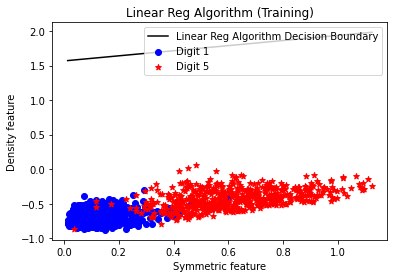

In [7]:
#Your code here#
#pseudo inverse method
#Minimising the error_fn , equate it to 0 and solve
# w = y * inv(x^ * x) * (x^)
class Linear_reg_1:
    def __init__(self,x,y):
        self.input = x
        self.label = y
    def fit(self):
        first_step = np.matmul( np.transpose(self.input) , self.input )
        second_step = np.matmul(first_step, np.transpose(self.input))
        self.weights = np.matmul(second_step, self.label)

    def error(self,input,label):
        acc = 0
        for i in range(len(input)):
            temp = np.matmul(self.weights,input[i])
            if step(temp) == label[i]:
                acc+=1
        return 100 - acc*100/len(label)

lr_inv = Linear_reg_1(sample_train,y_train)
lr_inv.fit()
print("Error for train {:.2f}%".format(lr_inv.error(sample_train,sample_y_train)))
print("Error for test {:.2f}%".format(lr_inv.error(sample_test,sample_y_test)))

# Visualization
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for LR Algorithm
x_decision_pocket = np.linspace(np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0]), 100)
y_decision_pocket = ((-lr_inv.weights[1] / lr_inv.weights[2]) * x_decision_pocket) - (lr_inv.weights[0] / lr_inv.weights[2])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='Linear Reg Algorithm Decision Boundary')

plt.title('Linear Reg Algorithm (Training)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()


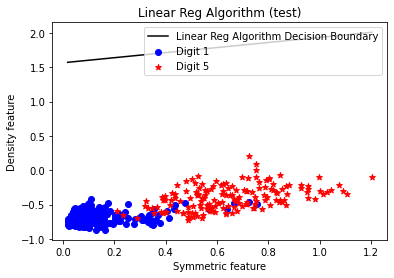

In [8]:
# Visualization
plt.figure()
plt.scatter(Test_feature[index_positive_test, 0], Test_feature[index_positive_test, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Test_feature[index_negative_test, 0], Test_feature[index_negative_test, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for LR Algorithm
x_decision_pocket = np.linspace(np.min(Test_feature[:, 0]), np.max(Test_feature[:, 0]), 100)
y_decision_pocket = ((-lr_inv.weights[1] / lr_inv.weights[2]) * x_decision_pocket) - (lr_inv.weights[0] / lr_inv.weights[2])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='Linear Reg Algorithm Decision Boundary')

plt.title('Linear Reg Algorithm (test)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()


#2. Using the initialization from the linear regression, implement pocket algorithm for improvement.

(Write the algorithm without using pre-existing Libraries )

Following are the points you should consider while answering the following:

1.  Define Pocket Algorithm
2.  Initialize the weights
3.  Calculate In sample error
4.  Visualize data points and plot the boundary.

(Tip: Your in-sample error for pocket algorithm should be less that the in-sample errors for regular linear regression)

Error for train 2.11%
Error for test 4.01%


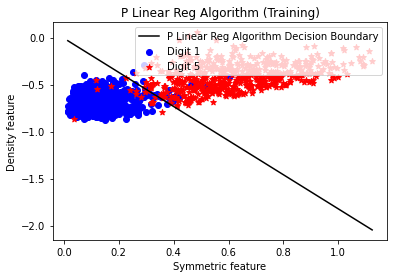

In [9]:
'''
Pocket Learning algorithm as same as the classic Perceptron learning algorithm with a change in choice of hypothesis selection,
the Pocket algorithm is a refinement of the PLA that keeps track of the best solution encountered during the learning process.
Refer code comment for further explanation
'''
#Your Code Here#
class PLA:
    def __init__(self,input,label,iteration):
        self.input = input
        self.label = label
        self.weights = np.random.random(input.shape[1])
        self.p_w =0
        self.p_acc = 0
        self.iteration = iteration
    def fit(self,lr_pla):
        k = 0
        #This is a break point if a hypopthesis is a perfect fit. Eg : no misclassified point.
        converged = False
        while k < self.iteration and converged == False:
            k+=1
            for i in range(len(self.input)):
                x = self.input[i]
                y = self.label[i]

                y_pred = np.matmul(x,self.weights)
                #Making the correction for the current iteration.
                #There was a problem I encountered during using weights from previous lr_inv in this algorithm,
                #The weights was way too big for pla to make any change with it's gradients, simpler term,
                #self.weights += x : here change factor "x" was making insignificant change to weight, this was resulting in,
                #same accuracy in both lr_inv and pla, to solve this I included a reverse learning rate, simpler term make sure,
                #change factor "x" was multiplied and then add/sub to weight so x * lr.
                if step(y_pred) != int(y):
                    if y == 1 :
                        self.weights += (x*lr_pla)
                    else:
                        self.weights -= (x*lr_pla)
                        
                y_pred = np.sign(np.matmul( self.input,self.weights))
                y_pred[y_pred == 0] = -1
                #calculating error
                accuracy = np.mean(y_pred == self.label)
                #if the accuracy of current hypothesis is greater than the one in pocket replace the pocket with current or ignore.
                if accuracy == 1:
                    converged = True
                if accuracy > self.p_acc :
                    self.p_w = self.weights
                    self.p_acc = accuracy
    def error(self,input,label):
        acc = 0
        for i in range(len(input)):
            temp = np.matmul(self.weights,input[i])
            if step(temp) == label[i]:
                acc+=1
        return 100 - acc*100/len(label)


LR_PLA = PLA(sample_train,y_train,100)
#I am using the weights from previous lr_inv model as we were told to improve the model using pocket algorithm.
LR_PLA.weights = copy.copy(lr_inv.weights)
LR_PLA.fit(50)
print("Error for train {:.2f}%".format(LR_PLA.error(sample_train,sample_y_train)))
print("Error for test {:.2f}%".format(LR_PLA.error(sample_test,sample_y_test)))

# Visualization
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for LR Algorithm
x_decision_pocket = np.linspace(np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0]), 100)
y_decision_pocket = ((-LR_PLA.weights[1] / LR_PLA.weights[2]) * x_decision_pocket) - (LR_PLA.weights[0] / LR_PLA.weights[2])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='P Linear Reg Algorithm Decision Boundary')

plt.title('P Linear Reg Algorithm (Training)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()


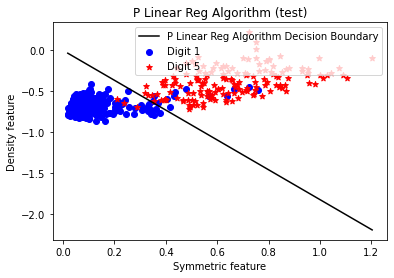

In [10]:
# Visualization
plt.figure()
plt.scatter(Test_feature[index_positive_test, 0], Test_feature[index_positive_test, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Test_feature[index_negative_test, 0], Test_feature[index_negative_test, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for LR Algorithm
x_decision_pocket = np.linspace(np.min(Test_feature[:, 0]), np.max(Test_feature[:, 0]), 100)
y_decision_pocket = ((-LR_PLA.weights[1] / LR_PLA.weights[2]) * x_decision_pocket) - (LR_PLA.weights[0] / LR_PLA.weights[2])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='P Linear Reg Algorithm Decision Boundary')

plt.title('P Linear Reg Algorithm (test)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()


#3. Implement Logistic regression for classification using gradident descent


Following are the points you should consider while answering the following:

1. Sigmoid function.
2. Define Gradient Descent for the model.
3. Fit the model using Gradient Descent.
4. Calculate in-sample errors for test and train data.
5. Visualize.

In [11]:
"""
"""
#Your Code Here#
class LR_GD:
    def __init__(self,input,label):
        self.input = input
        self.label = label
        self.weights = np.random.random(input.shape[1])

    def step(self,x):
        if x > 0.5:
            return 1
        else:
            return 0
    
    #This is a variant of sigmoid, "Stable Sigmoid" it take cares of the numerical overflow,
    #problem when the input is large negative number.
    def sigmoid(self,x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)
        
    #To optimise this algorithm further I have added decay rate where the lr will be dropped by decay% every,
    #(10% of the epoch) Eg : epoch = 100 drop at every 10 iteration, this should take care of overshooting in the convex function,
    #that will reach global minnimma faster.
    def fit(self,lr=0.01,epoch=100,decay=0.9):
        for i in range(epoch):
            y_pred = np.matmul(self.input, self.weights)
            y_pred = [self.step(self.sigmoid(x)) for x in y_pred]

            grad = (1/len(self.input)) * np.dot((y_pred - self.label) , self.input)

            self.weights -= lr * grad
            if (i%(0.1*epoch) == 0):
                lr*=decay

    def error(self,input,label):
        acc = 0
        for i in range(len(input)):
            y_pred = np.matmul(input[i], self.weights)
            y_pred = self.step(self.sigmoid(y_pred))
            if y_pred == label[i]:
                acc+=1
        return 100-acc*100/len(label)

#Due to the cost_fn of the Logictic regression (maximmum likelihood) is designed to accept values of only 0,1 we will,
#treat -1 as 0.
sample_y_train[sample_y_train == -1] = 0
sample_y_test[sample_y_test == -1] = 0

lr_gd = LR_GD(sample_train,sample_y_train)

lr_gd.fit(lr=0.05,epoch=700,decay=0.9)
print("Error for train {:.2f}%".format(lr_gd.error(sample_train,sample_y_train)))
print("Error for test {:.2f}%".format(lr_gd.error(sample_test,sample_y_test)))

Error for train 6.60%
Error for test 9.91%


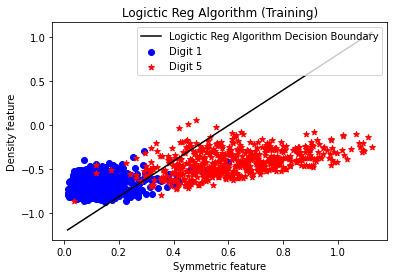

In [12]:
# Visualization
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for LR Algorithm
x_decision_pocket = np.linspace(np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0]), 100)
y_decision_pocket = ((-lr_gd.weights[1] / lr_gd.weights[2]) * x_decision_pocket) - (lr_gd.weights[0] / lr_gd.weights[2])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='Logictic Reg Algorithm Decision Boundary')

plt.title('Logictic Reg Algorithm (Training)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()


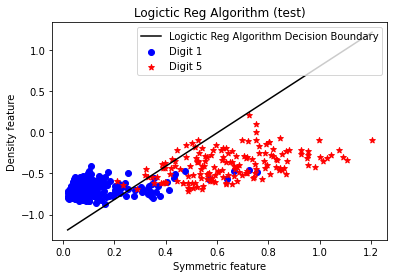

In [13]:
# Visualization
plt.figure()
plt.scatter(Test_feature[index_positive_test, 0], Test_feature[index_positive_test, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Test_feature[index_negative_test, 0], Test_feature[index_negative_test, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for LR Algorithm
x_decision_pocket = np.linspace(np.min(Test_feature[:, 0]), np.max(Test_feature[:, 0]), 100)
y_decision_pocket = ((-lr_gd.weights[1] / lr_gd.weights[2]) * x_decision_pocket) - (lr_gd.weights[0] / lr_gd.weights[2])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='Logictic Reg Algorithm Decision Boundary')

plt.title('Logictic Reg Algorithm (test)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()


#4.  Implement Logistic regression for classification using mini-batch stochastic gradident descent

(Try to use pre-existing Libraries for this question from Sklearn)

SGD Algorithm - In-Sample Error (Training): 2.37%
SGD Algorithm - In-Sample Error (Test): 4.25%


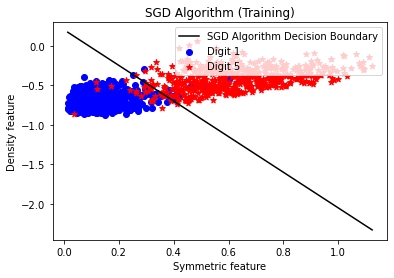

In [14]:
#Your Code Here#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Logistic Regression using scikit-learn (for comparison)
sklearn_lr = LogisticRegression()
sklearn_lr.fit(Train_feature, y_train)

accuracy_sklearn_train = sklearn_lr.score(Train_feature, y_train)
accuracy_sklearn_test = sklearn_lr.score(Test_feature, y_test)

print("SGD Algorithm - In-Sample Error (Training): {:.2f}%".format((1-accuracy_sklearn_train) * 100))
print("SGD Algorithm - In-Sample Error (Test): {:.2f}%".format((1-accuracy_sklearn_test) * 100))

# Visualization
plt.figure()
plt.scatter(Train_feature[index_positive_train, 0], Train_feature[index_positive_train, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Train_feature[index_negative_train, 0], Train_feature[index_negative_train, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for SGD Algorithm
x_decision_pocket = np.linspace(np.min(Train_feature[:, 0]), np.max(Train_feature[:, 0]), 100)
y_decision_pocket = (-sklearn_lr.coef_[0, 0] / sklearn_lr.coef_[0, 1]) * x_decision_pocket + (-sklearn_lr.intercept_ / sklearn_lr.coef_[0, 1])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='SGD Algorithm Decision Boundary')

plt.title('SGD Algorithm (Training)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()


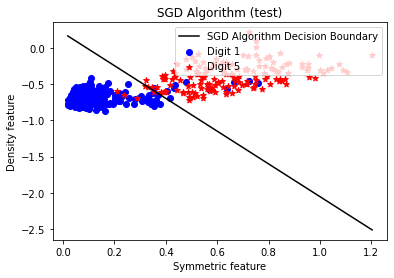

In [15]:
# Visualization
plt.figure()
plt.scatter(Test_feature[index_positive_test, 0], Test_feature[index_positive_test, 1], c='b', marker='o', label='Digit 1')
plt.scatter(Test_feature[index_negative_test, 0], Test_feature[index_negative_test, 1], c='r', marker='*', label='Digit 5')

# Plot the decision boundary for LR Algorithm
x_decision_pocket = np.linspace(np.min(Test_feature[:, 0]), np.max(Test_feature[:, 0]), 100)
y_decision_pocket = (-sklearn_lr.coef_[0, 0] / sklearn_lr.coef_[0, 1]) * x_decision_pocket + (-sklearn_lr.intercept_ / sklearn_lr.coef_[0, 1])

plt.plot(x_decision_pocket, y_decision_pocket, 'k-', label='SGD Algorithm Decision Boundary')

plt.title('SGD Algorithm (test)')
plt.xlabel('Symmetric feature')
plt.ylabel('Density feature')
plt.legend(loc='upper right')
plt.show()


#5. Using a 3rd order polynomical transform, and implement linear regression for classification

(Use Pre-existing Libraries for this question)

In [16]:
#Your Code Here#
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

reg.fit(Train_feature, y_train)

# Make predictions
y_pred = reg.predict(Train_feature)
y_pred_binary = (y_pred >= 0.5).astype(int)
y_pred_binary[y_pred_binary == 0] = -1
acc_train = np.mean(y_pred_binary == y_train)

y_pred = reg.predict(Test_feature)
y_pred_binary = (y_pred >= 0.5).astype(int)
y_pred_binary[y_pred_binary == 0] = -1
acc_test = np.mean(y_pred_binary == y_test)

print("Poly Algorithm - In-Sample Error (Training): {:.2f}%".format((1-acc_train) * 100))
print("Poly Algorithm - In-Sample Error (Test): {:.2f}%".format((1-acc_test) * 100))



Poly Algorithm - In-Sample Error (Training): 4.80%
Poly Algorithm - In-Sample Error (Test): 8.25%
